In [275]:
import numpy as np
import pandas as pd
from plotnine import *

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

In [276]:
# Import danych

df = pd.read_csv('auta.csv', index_col = 0)
df.shape
df.head()

,Cena,Przebieg,Pojemnosc,KM,diesle
Audi A3,20900.0,164450.0,1896.0,110,66.9
Audi A4,25311.4,182000.0,1900.0,130,75.7
Audi A6,31500.0,185000.0,2496.0,170,82.5
Audi A8,109000.0,129380.0,4134.0,300,68.1
Audi Q7,179000.0,72000.0,3000.0,240,89.1


In [277]:
# Standaryzacja danych

z = StandardScaler()

auta_1 = df.copy()
auta_1[auta_1.columns] = z.fit_transform(df[df.columns])
auta_1_cols = auta_1.columns

In [278]:
auta_1.head()

,Cena,Przebieg,Pojemnosc,KM,diesle
Audi A3,-0.198580,0.484563,-0.017676,-0.248784,0.040064
Audi A4,-0.055174,0.944320,-0.009643,0.202004,0.458097
Audi A6,0.146007,1.022911,1.187258,1.103579,0.781122
Audi A8,2.665391,-0.434164,4.476727,4.033697,0.097069
Audi Q7,4.940965,-1.937346,2.199402,2.681335,1.094646


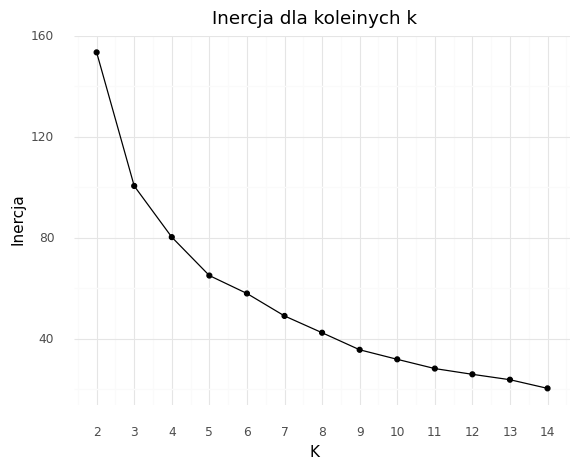

<ggplot: (147075898420)>

In [279]:
# Sprawdzenie optymalnej liczby klastrów dla zbioru danych

ks = range(2,15)
inercje = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=0).fit(auta_1)
    inercje.append(km.inertia_)
    
inercje_df = pd.DataFrame({'K':ks, 'Inercja' : inercje})

(ggplot(inercje_df, aes(x='K', y='Inercja'))+
 geom_point()+geom_line() +
 scale_x_continuous(breaks = ks)+
 theme_minimal()+
 labs(title = 'Inercja dla koleinych k'))

## Grupowanie K-means

In [328]:
# Decyzja - 5 klastrów. 
# Grupowanie K-means

km = KMeans(n_clusters = 5).fit(auta_1)

auta_1['klastry'] = km.labels_

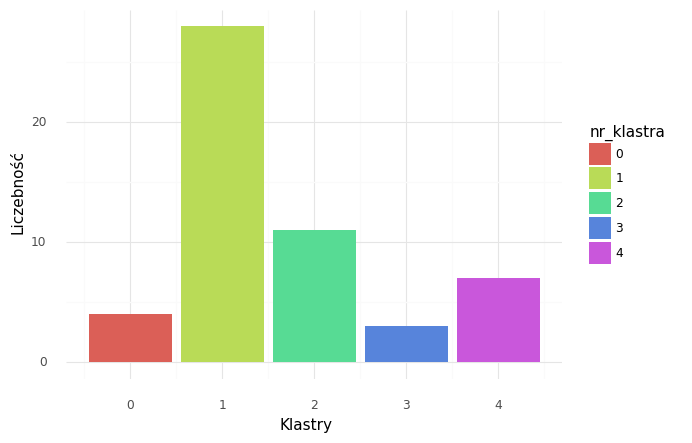

<ggplot: (147077345253)>

In [329]:
# Interpretacja wyników - segmentacja

(ggplot(auta_1, aes(x = 'klastry', fill = 'factor(klastry)')) +
 geom_bar()+
 theme_minimal()+
 labs(x = 'Klastry', y = 'Liczebność', fill = 'nr_klastra'))

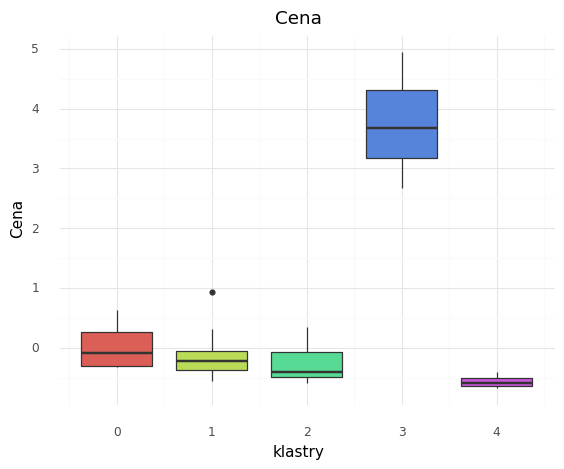

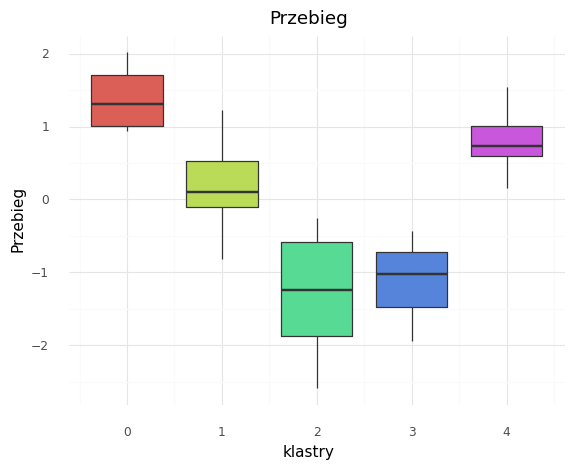

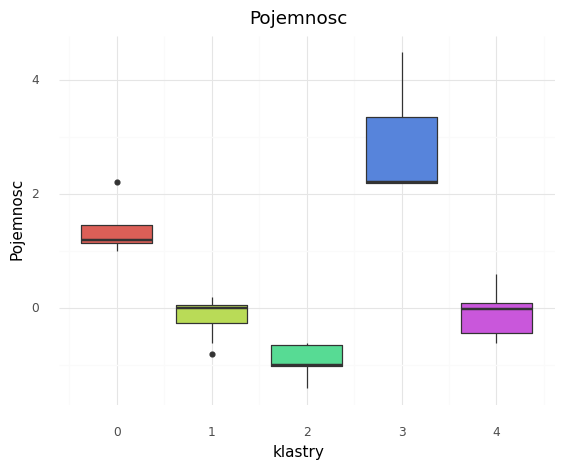

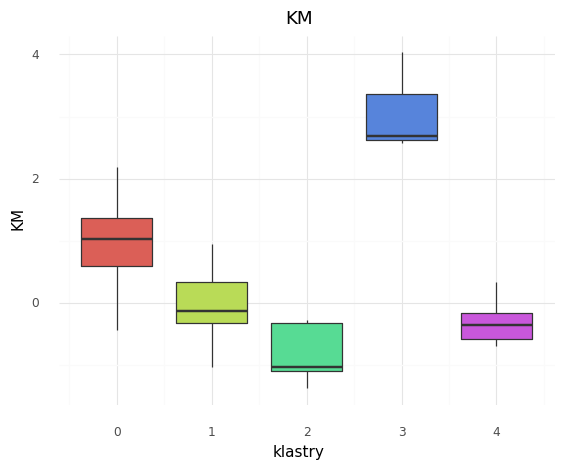

In [330]:
for zm in auta_1_cols[:-1]:
    print((ggplot(auta_1, aes(x = 'klastry', y = zm, fill = 'factor(klastry)')) + 
 geom_boxplot(show_legend = False) + 
 theme_minimal() +
 labs(x = 'klastry', title = zm)))

## Grupowanie GMM

In [332]:
auta_2 = df.copy()
auta_2[auta_2.columns] = z.fit_transform(df[df.columns])
auta_2_cols = auta_2.columns

auta_2.head()

,Cena,Przebieg,Pojemnosc,KM,diesle
Audi A3,-0.198580,0.484563,-0.017676,-0.248784,0.040064
Audi A4,-0.055174,0.944320,-0.009643,0.202004,0.458097
Audi A6,0.146007,1.022911,1.187258,1.103579,0.781122
Audi A8,2.665391,-0.434164,4.476727,4.033697,0.097069
Audi Q7,4.940965,-1.937346,2.199402,2.681335,1.094646


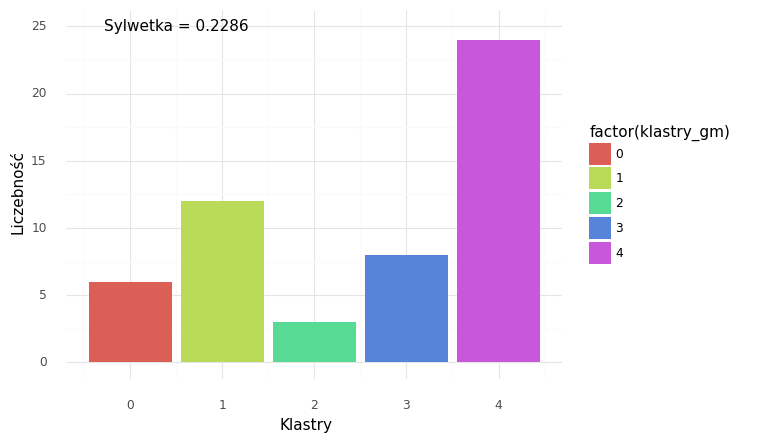

<ggplot: (147077354629)>

In [333]:
gm = GaussianMixture(n_components=5).fit(auta[auta_cols])

auta_2['klastry_gm'] = gm.predict(auta_2[auta_2_cols])
sylwetka_gm = round(silhouette_score(auta_2[auta_2_cols], gm.predict(auta_2[auta_2_cols])),4)

(ggplot(auta_2, aes(x = 'klastry_gm', fill = 'factor(klastry_gm)')) +
 geom_bar()+
 annotate('text', x = 0.5, y = 25, label = f'Sylwetka = {sylwetka_gm}')+
 theme_minimal()+
 labs(x = 'Klastry', y = 'Liczebność'))

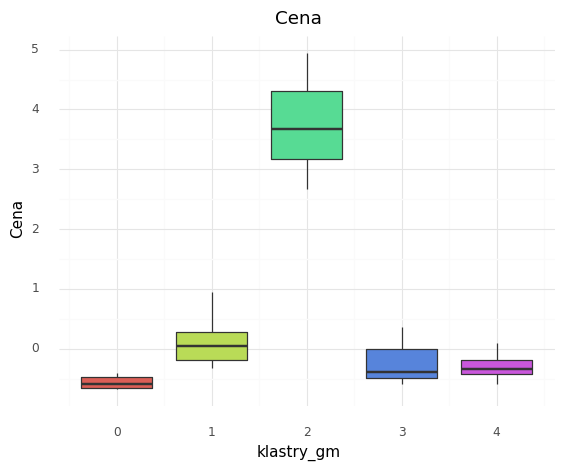

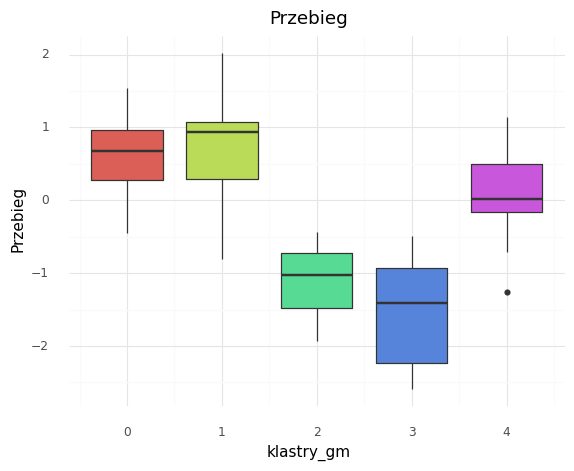

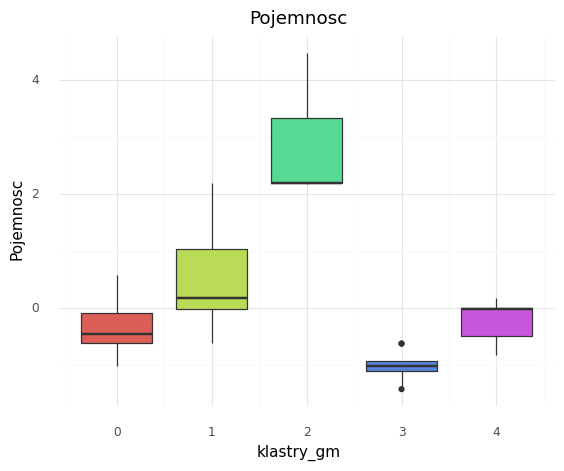

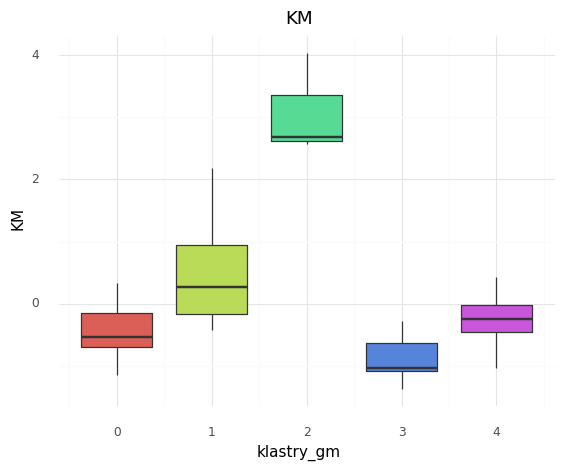

In [337]:
for zm in auta_2_cols[:-1]:
    print((ggplot(auta_2, aes(x = 'klastry_gm', y = zm, fill = 'factor(klastry_gm)')) + 
 geom_boxplot(show_legend = False) + 
 theme_minimal() +
 labs(x = 'klastry_gm', title = zm)))

## Grupowanie DBSCAN

In [342]:
auta_3 = df.copy()
auta_3[auta_3.columns] = z.fit_transform(df[df.columns])
auta_3_cols = auta_3.columns

auta_3.head()

,Cena,Przebieg,Pojemnosc,KM,diesle
Audi A3,-0.198580,0.484563,-0.017676,-0.248784,0.040064
Audi A4,-0.055174,0.944320,-0.009643,0.202004,0.458097
Audi A6,0.146007,1.022911,1.187258,1.103579,0.781122
Audi A8,2.665391,-0.434164,4.476727,4.033697,0.097069
Audi Q7,4.940965,-1.937346,2.199402,2.681335,1.094646


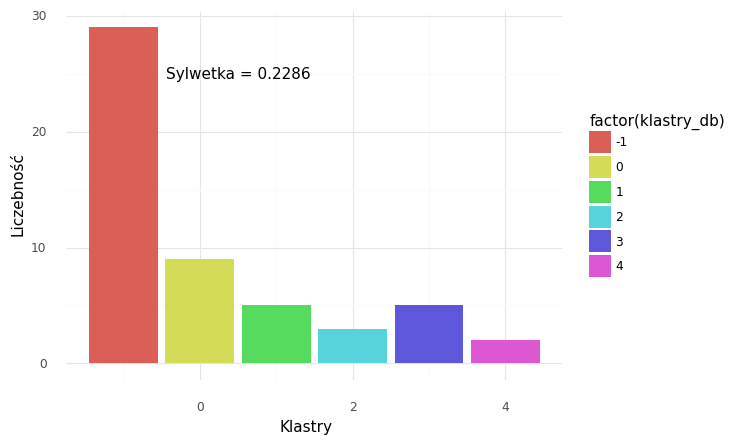

<ggplot: (147077342793)>

In [343]:
db = DBSCAN(eps = 0.5, min_samples = 2).fit(auta_3[auta_3_cols])   #eps = 5 promie otaczający

auta_3['klastry_db'] = db.labels_
sylwetka_db = round(silhouette_score(auta_3[auta_3_cols],  db.labels_),4)

(ggplot(auta_3, aes(x = 'klastry_db', fill = 'factor(klastry_db)')) +
 geom_bar()+
 annotate('text', x = 0.5, y = 25, label = f'Sylwetka = {sylwetka_gm}')+
 theme_minimal()+
 labs(x = 'Klastry', y = 'Liczebność'))

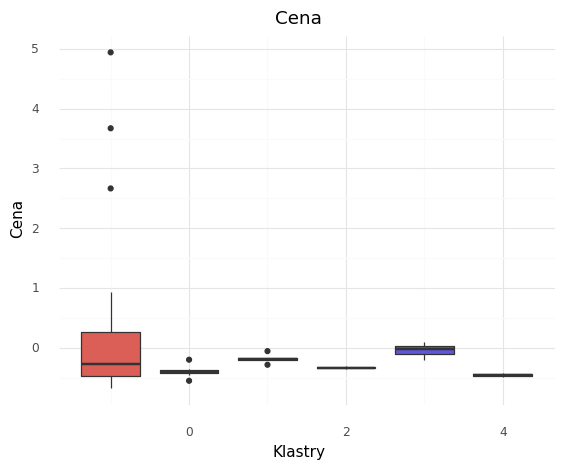

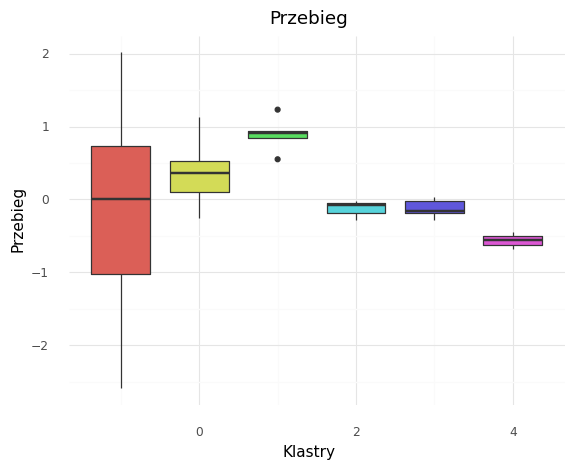

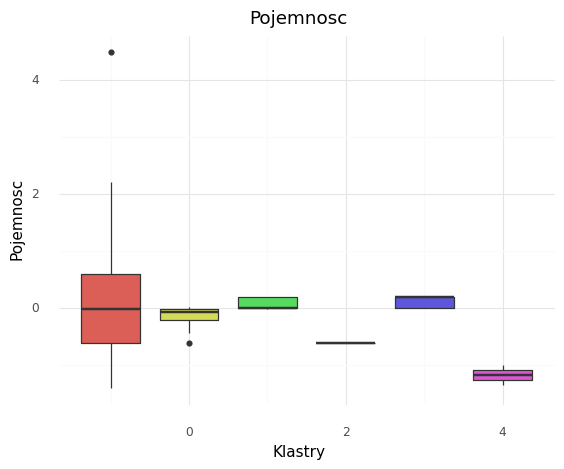

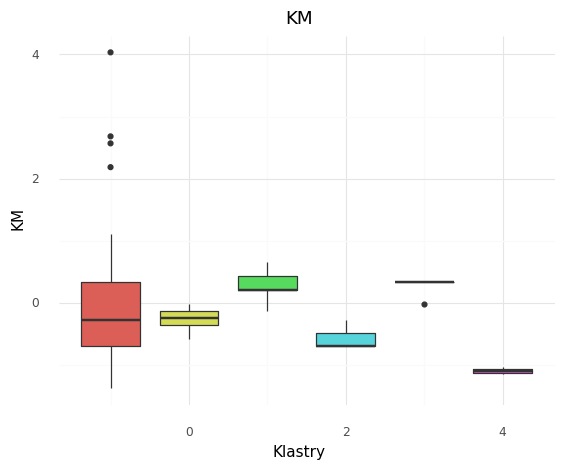

In [344]:
for zm in auta_3_cols[:-1]:
    print((ggplot(auta_3, aes(x = 'klastry_db', y = zm, fill = 'factor(klastry_db)')) + 
 geom_boxplot(show_legend = False) + 
 theme_minimal() +
 labs(x = 'Klastry', title = zm)))

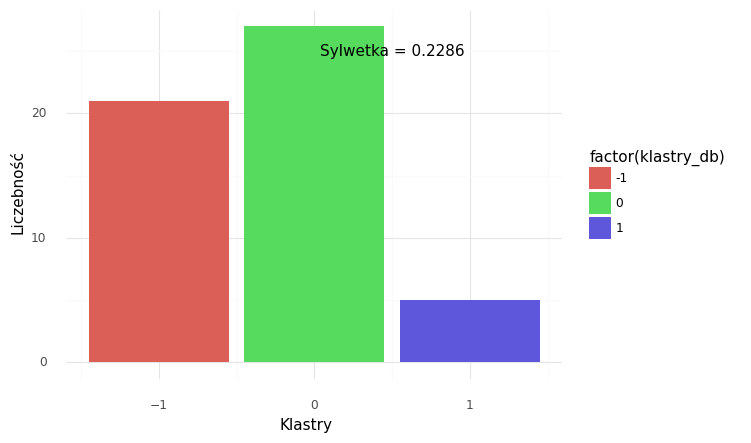

<ggplot: (147079033573)>

In [345]:
db = DBSCAN(eps = 0.8, min_samples = 5).fit(auta_3[auta_3_cols])   #eps = 5 promie otaczający

auta_3['klastry_db'] = db.labels_
sylwetka_db = round(silhouette_score(auta_3[auta_3_cols],  db.labels_),4)

(ggplot(auta_3, aes(x = 'klastry_db', fill = 'factor(klastry_db)')) +
 geom_bar()+
 annotate('text', x = 0.5, y = 25, label = f'Sylwetka = {sylwetka_gm}')+
 theme_minimal()+
 labs(x = 'Klastry', y = 'Liczebność'))

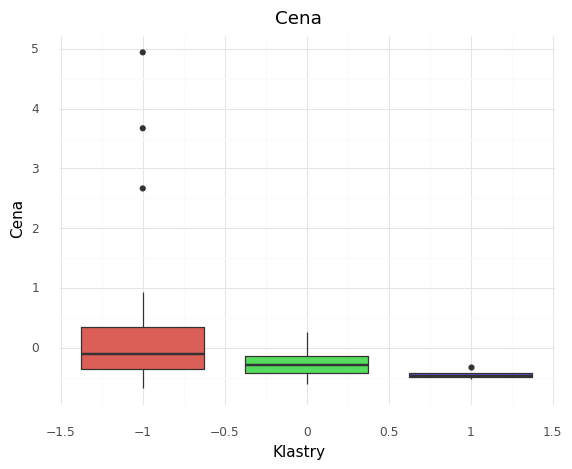

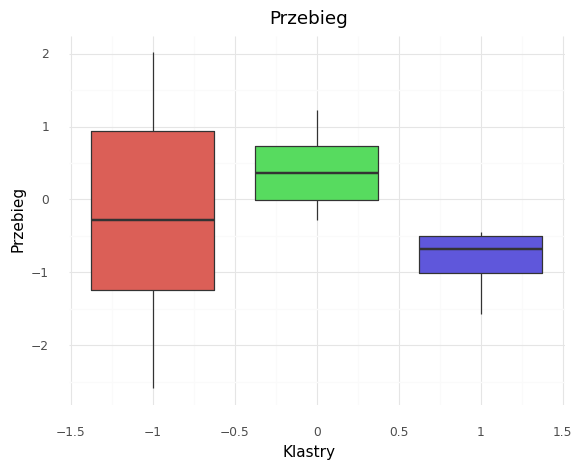

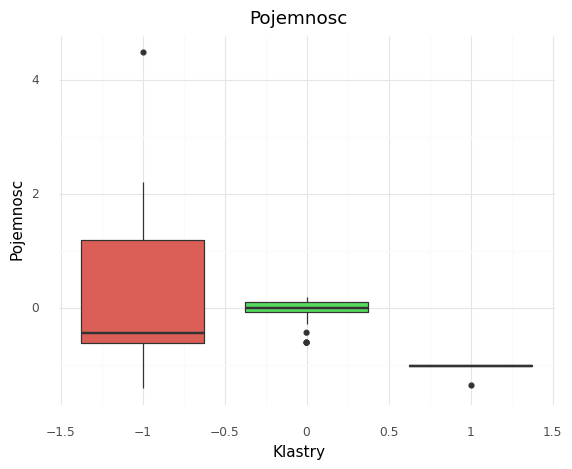

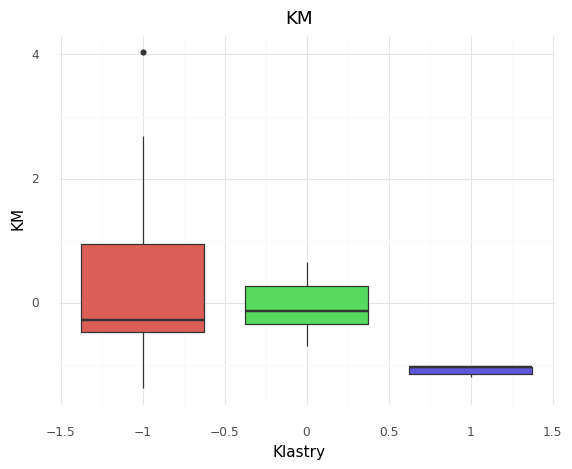

In [346]:
for zm in auta_3_cols[:-1]:
    print((ggplot(auta_3, aes(x = 'klastry_db', y = zm, fill = 'factor(klastry_db)')) + 
 geom_boxplot(show_legend = False) + 
 theme_minimal() +
 labs(x = 'Klastry', title = zm)))